In [9]:
pip install split-folders


In [2]:
conda install scikit-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
import splitfolders
splitfolders.ratio('plantvillage-dataset/color', output="output", seed=1337, ratio=(.8, .2), group_prefix=None)

In [1]:
import numpy as np
from re import sub
import tensorflow as tf
from tensorflow.keras import metrics

import matplotlib.colors as mcolors
from sklearn.metrics import confusion_matrix
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
METRICS = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.CategoricalAccuracy(name='accuracy'),
      metrics.Precision(name='precision'),
      metrics.Recall(name='recall'),
      metrics.AUC(name='auc')
]

In [3]:
BATCH_SIZE = 16
IMG_SIZE = (224, 224)
IMG_SHAPE = IMG_SIZE + (3,)

#Using InceptionV3 CNN architecture

In [10]:
from tensorflow.keras.applications.inception_v3 import preprocess_input

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./output/train',
                                                 target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=train_datagen.flow_from_directory('./output/val',
                                                     target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 52131 images belonging to 38 classes.
Found 15178 images belonging to 38 classes.


In [11]:
classes = train_generator.class_indices
class_list = list(classes.keys())

In [12]:
base_model=tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(38,activation='softmax')(x)

In [13]:
model=Model(inputs=base_model.input,outputs=preds)

In [14]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [15]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)

In [16]:
step_size_train=train_generator.n//train_generator.batch_size
model_history=model.fit(train_generator,
                    validation_data =val_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Epoch 1/5
1629/1629 [==============================] - 882s 541ms/step - loss: 0.6064 - tp: 40322.0000 - fp: 4727.0000 - tn: 1922936.0000 - fn: 11777.0000 - accuracy: 0.8224 - precision: 0.8951 - recall: 0.7739 - auc: 0.9887 - val_loss: 1.1108 - val_tp: 9835.0000 - val_fp: 2915.0000 - val_tn: 558671.0000 - val_fn: 5343.0000 - val_accuracy: 0.6969 - val_precision: 0.7714 - val_recall: 0.6480 - val_auc: 0.9671
Epoch 2/5
1629/1629 [==============================] - 889s 546ms/step - loss: 0.2303 - tp: 47931.0000 - fp: 2639.0000 - tn: 1925024.0000 - fn: 4168.0000 - accuracy: 0.9328 - precision: 0.9478 - recall: 0.9200 - auc: 0.9963 - val_loss: 0.2260 - val_tp: 13904.0000 - val_fp: 712.0000 - val_tn: 560874.0000 - val_fn: 1274.0000 - val_accuracy: 0.9329 - val_precision: 0.9513 - val_recall: 0.9161 - val_auc: 0.9966
Epoch 3/5
1629/1629 [==============================] - 748s 459ms/step - loss: 0.1600 - tp: 49324.0000 - fp: 1892.0000 - tn: 1925771.0000 - fn: 2775.0000 - accuracy: 0.9548 - pr

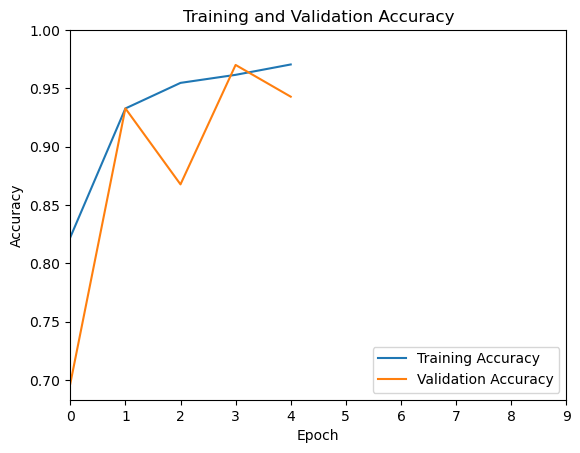

<Figure size 640x480 with 0 Axes>

In [17]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Accuracy.png")

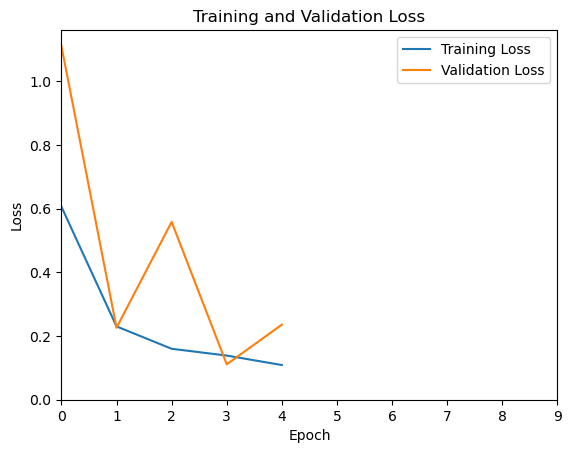

<Figure size 640x480 with 0 Axes>

In [18]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlim([0,9])
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Loss.png")

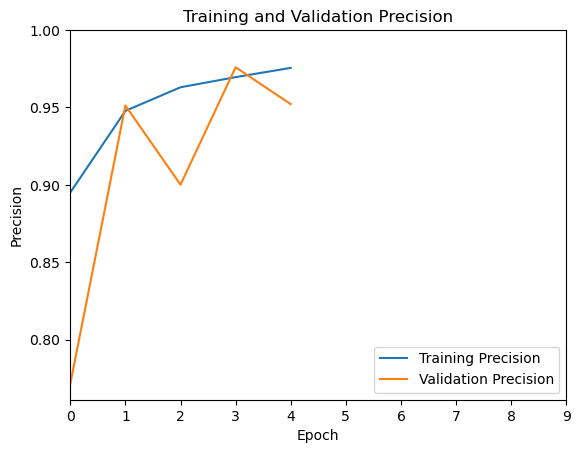

<Figure size 640x480 with 0 Axes>

In [19]:
pre = model_history.history['precision']
val_pre = model_history.history['val_precision']

plt.plot(pre, label='Training Precision')
plt.plot(val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Precision.png")

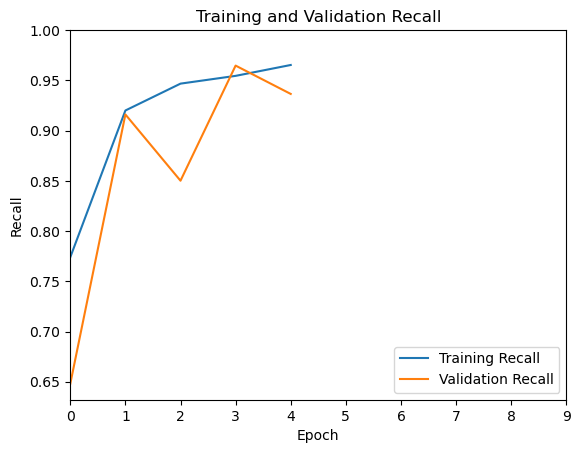

<Figure size 640x480 with 0 Axes>

In [20]:
rec = model_history.history['recall']
val_rec = model_history.history['val_recall']

plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel("Recall")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Recall.png")

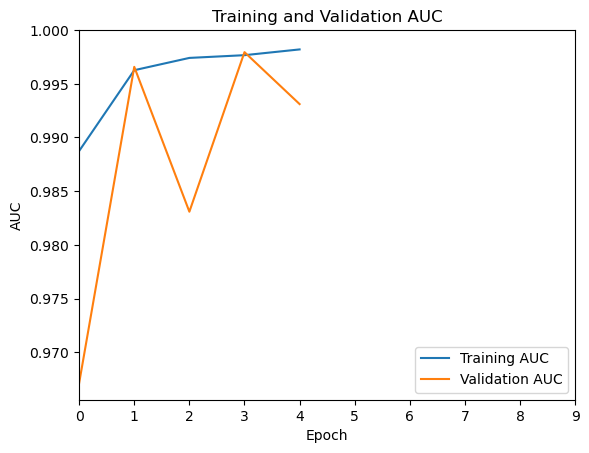

<Figure size 640x480 with 0 Axes>

In [21]:
auc = model_history.history['auc']
val_auc = model_history.history['val_auc']

plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel("AUC")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Auc.png")

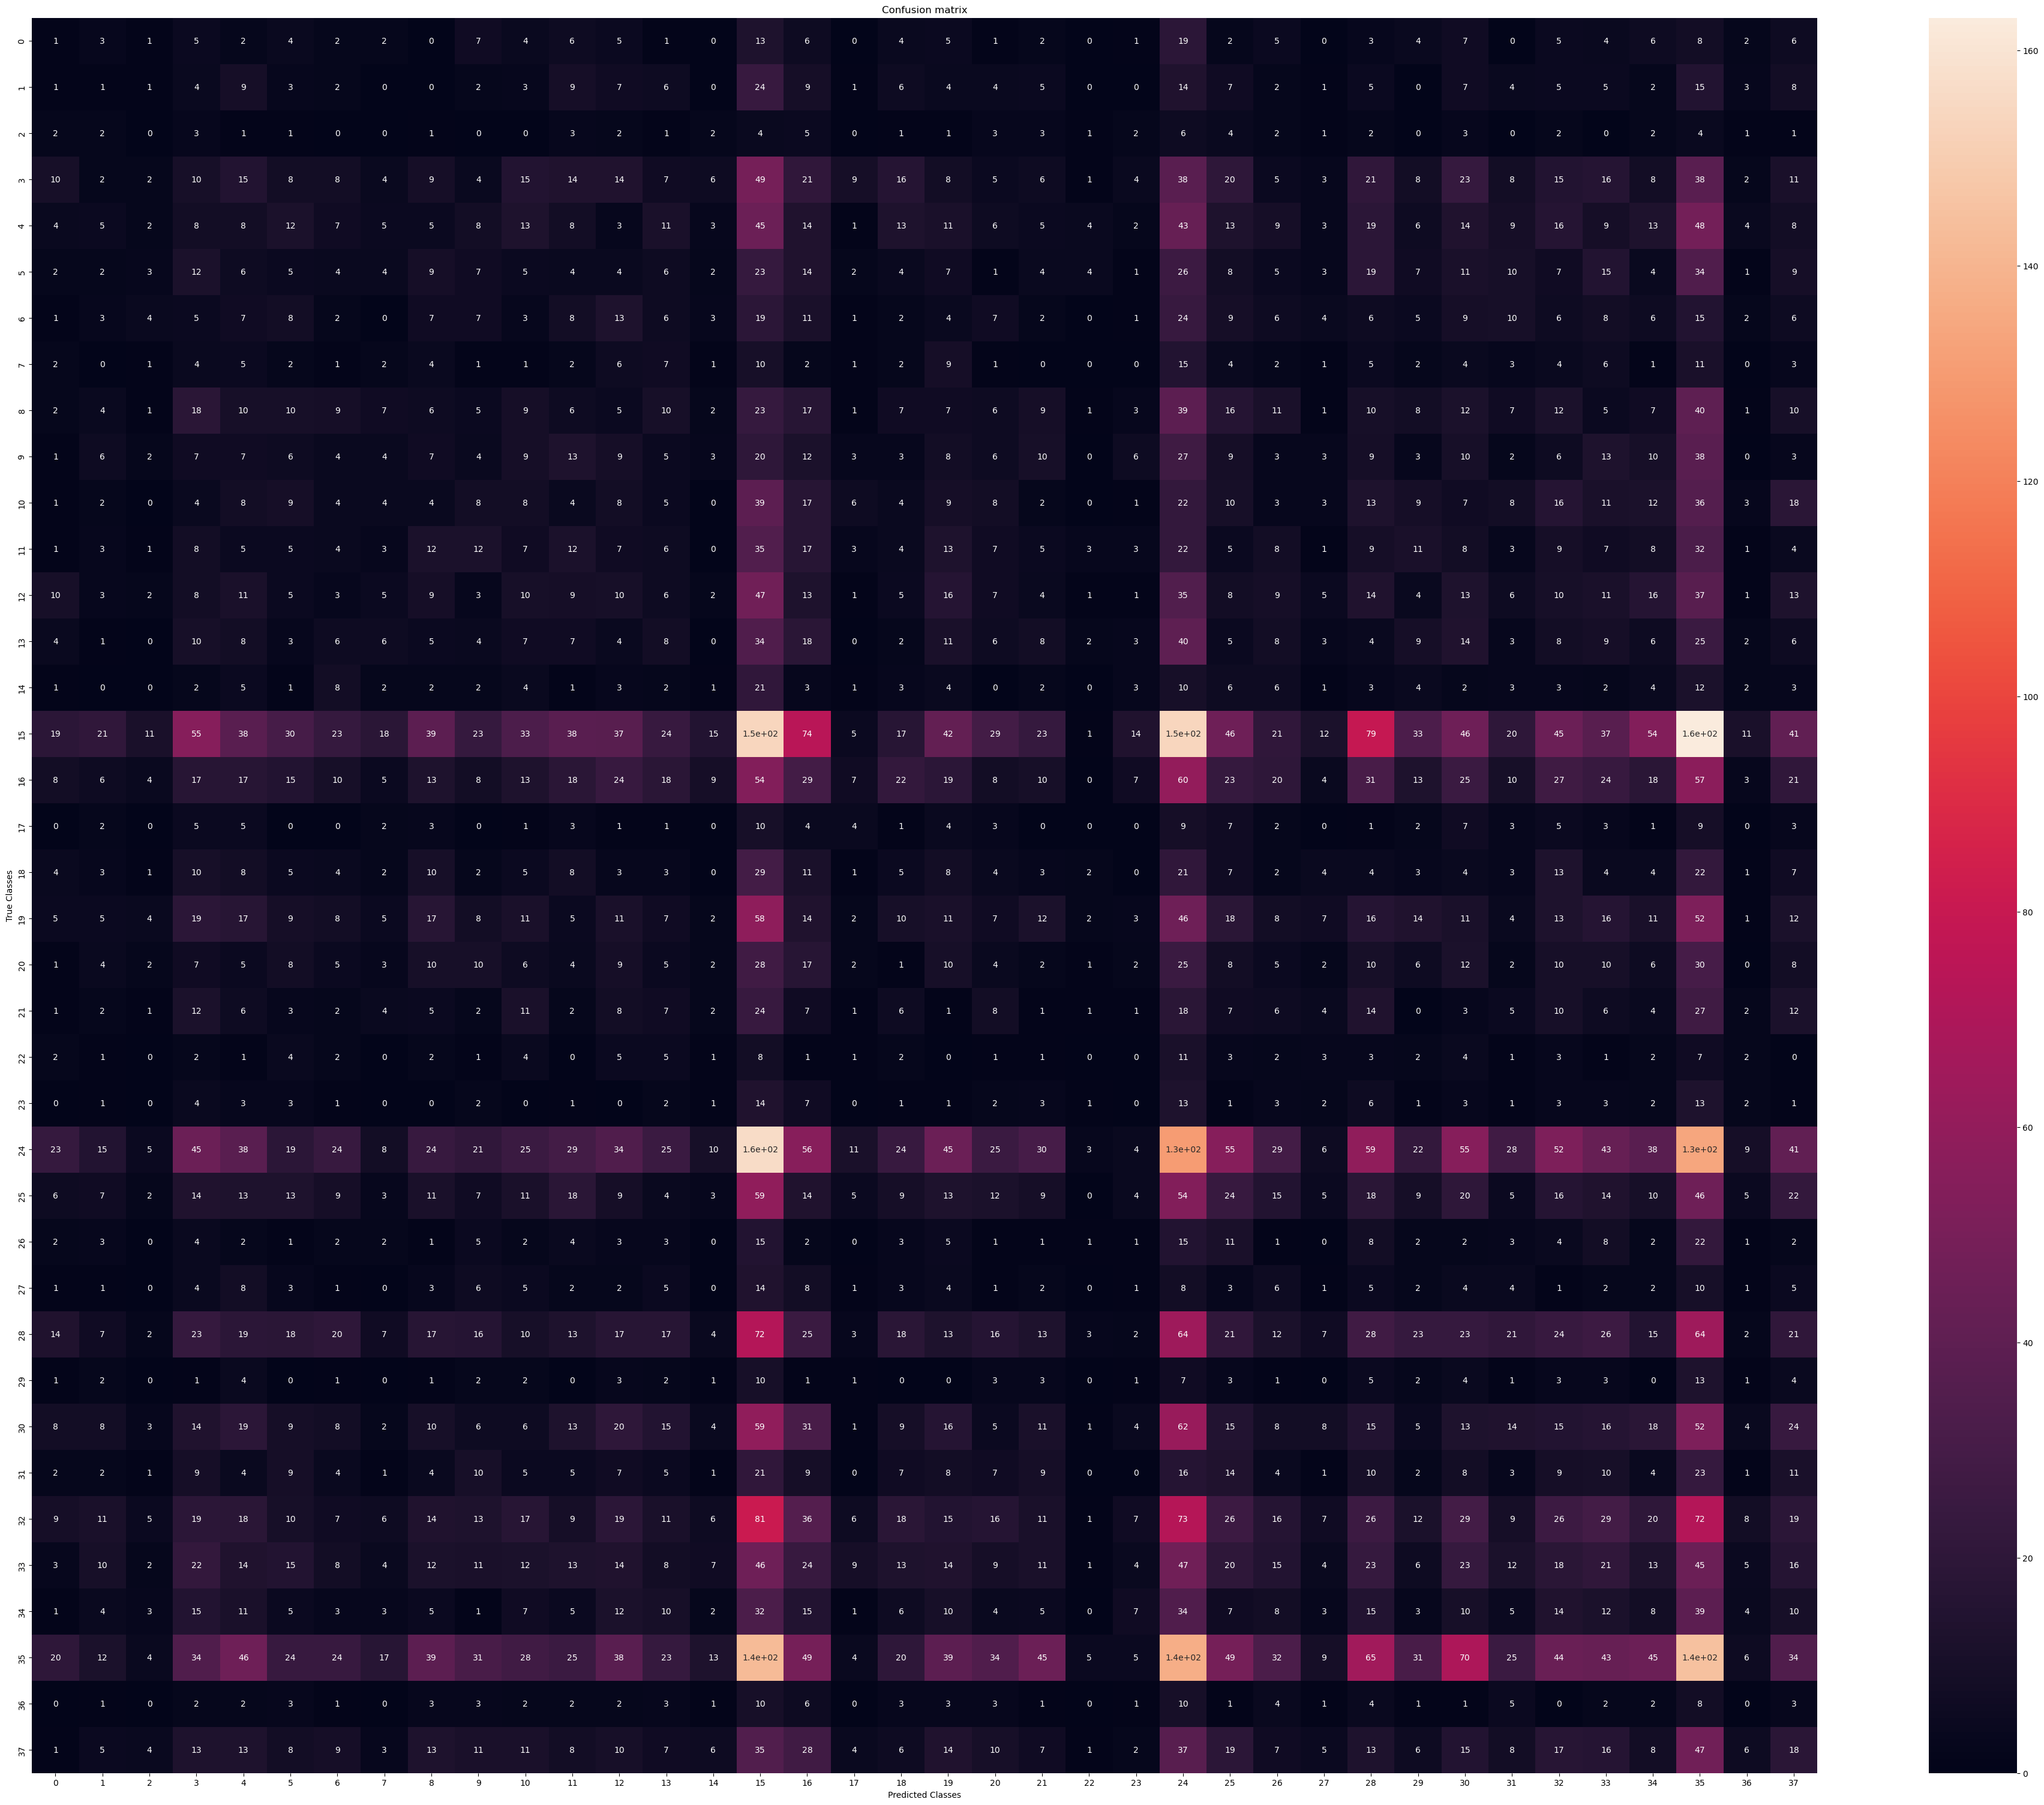

In [22]:
p = model.predict(val_generator)
p = np.argmax(p, axis=1)
y_true = val_generator.classes
c = confusion_matrix(p, y_true)

plt.figure(figsize=(48,38))
plt.title('Confusion matrix')
sns.heatmap(c, annot=True)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.plot()
plt.savefig("model_Confusion_matrix.png")

In [23]:
model.save("InceptionV3.h5")

#Using InceptionResNetV2 CNN architecture

In [14]:
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./output/train',
                                                 target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=train_datagen.flow_from_directory('./output/val',
                                                     target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 52131 images belonging to 38 classes.
Found 15178 images belonging to 38 classes.


In [15]:
base_model=tf.keras.applications.InceptionResNetV2(input_shape=IMG_SHAPE, weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(38,activation='softmax')(x)

In [16]:
model1=Model(inputs=base_model.input,outputs=preds)

In [17]:
for layer in model1.layers[:20]:
    layer.trainable=False
for layer in model1.layers[20:]:
    layer.trainable=True

In [18]:
model1.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)

In [21]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_train
model1_history=model1.fit(train_generator,
                    validation_data =val_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Epoch 1/5
3258/3258 [==============================] - 2768s 849ms/step - loss: 0.3919 - tp: 44407.0000 - fp: 3999.0000 - tn: 1924256.0000 - fn: 7708.0000 - accuracy: 0.8820 - precision: 0.9174 - recall: 0.8521 - auc: 0.9936 - val_loss: 0.7882 - val_tp: 13369.0000 - val_fp: 1342.0000 - val_tn: 560244.0000 - val_fn: 1809.0000 - val_accuracy: 0.8910 - val_precision: 0.9088 - val_recall: 0.8808 - val_auc: 0.9798
Epoch 2/5
3258/3258 [==============================] - 2578s 791ms/step - loss: 0.1754 - tp: 49016.0000 - fp: 2047.0000 - tn: 1926208.0000 - fn: 3099.0000 - accuracy: 0.9494 - precision: 0.9599 - recall: 0.9405 - auc: 0.9970 - val_loss: 0.0976 - val_tp: 14660.0000 - val_fp: 369.0000 - val_tn: 561217.0000 - val_fn: 518.0000 - val_accuracy: 0.9705 - val_precision: 0.9754 - val_recall: 0.9659 - val_auc: 0.9986
Epoch 3/5
3258/3258 [==============================] - 1988s 610ms/step - loss: 0.1354 - tp: 49889.0000 - fp: 1522.0000 - tn: 1926733.0000 - fn: 2226.0000 - accuracy: 0.9635 - 

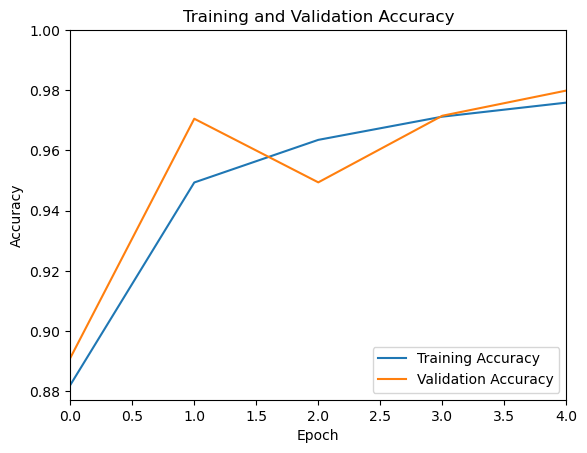

<Figure size 640x480 with 0 Axes>

In [23]:
acc = model1_history.history['accuracy']
val_acc = model1_history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,4])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model1_Accuracy.png")

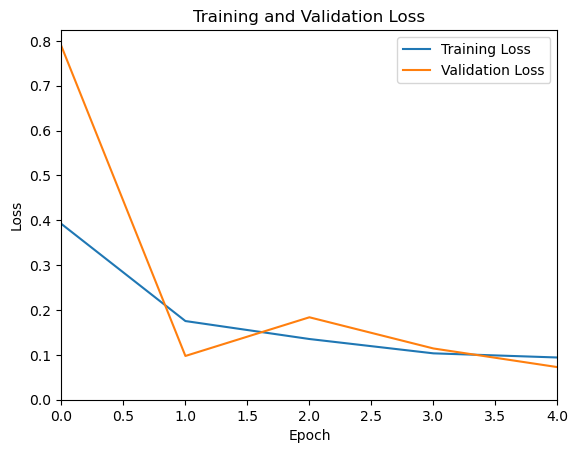

<Figure size 640x480 with 0 Axes>

In [25]:
loss = model1_history.history['loss']
val_loss = model1_history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlim([0,4])
plt.ylim([0,plt.ylim()[1]])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model1_Loss.png")

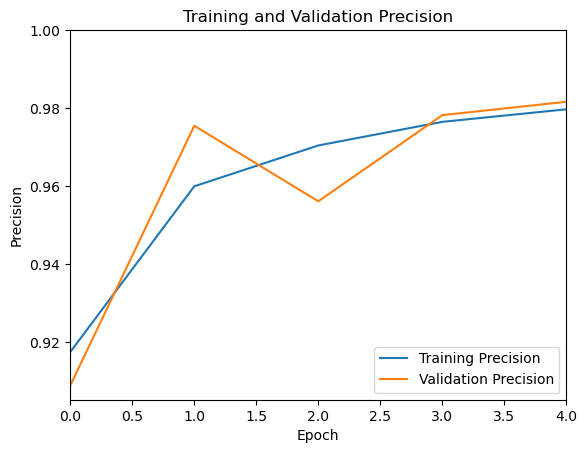

<Figure size 640x480 with 0 Axes>

In [26]:
pre = model1_history.history['precision']
val_pre = model1_history.history['val_precision']

plt.plot(pre, label='Training Precision')
plt.plot(val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlim([0,4])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model1_Precision.png")

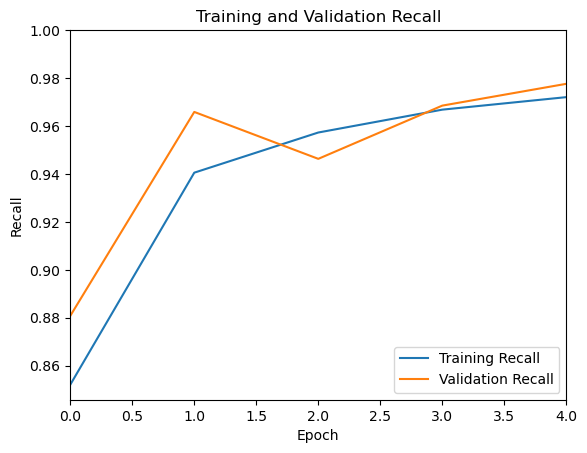

<Figure size 640x480 with 0 Axes>

In [27]:
rec = model1_history.history['recall']
val_rec = model1_history.history['val_recall']

plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel("Recall")
plt.xlim([0,4])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model1_Recall.png")

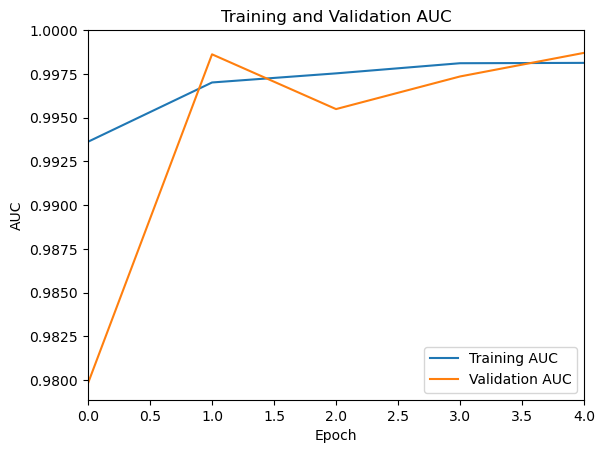

<Figure size 640x480 with 0 Axes>

In [28]:
auc = model1_history.history['auc']
val_auc = model1_history.history['val_auc']

plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel("AUC")
plt.xlim([0,4])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model1_Auc.png")

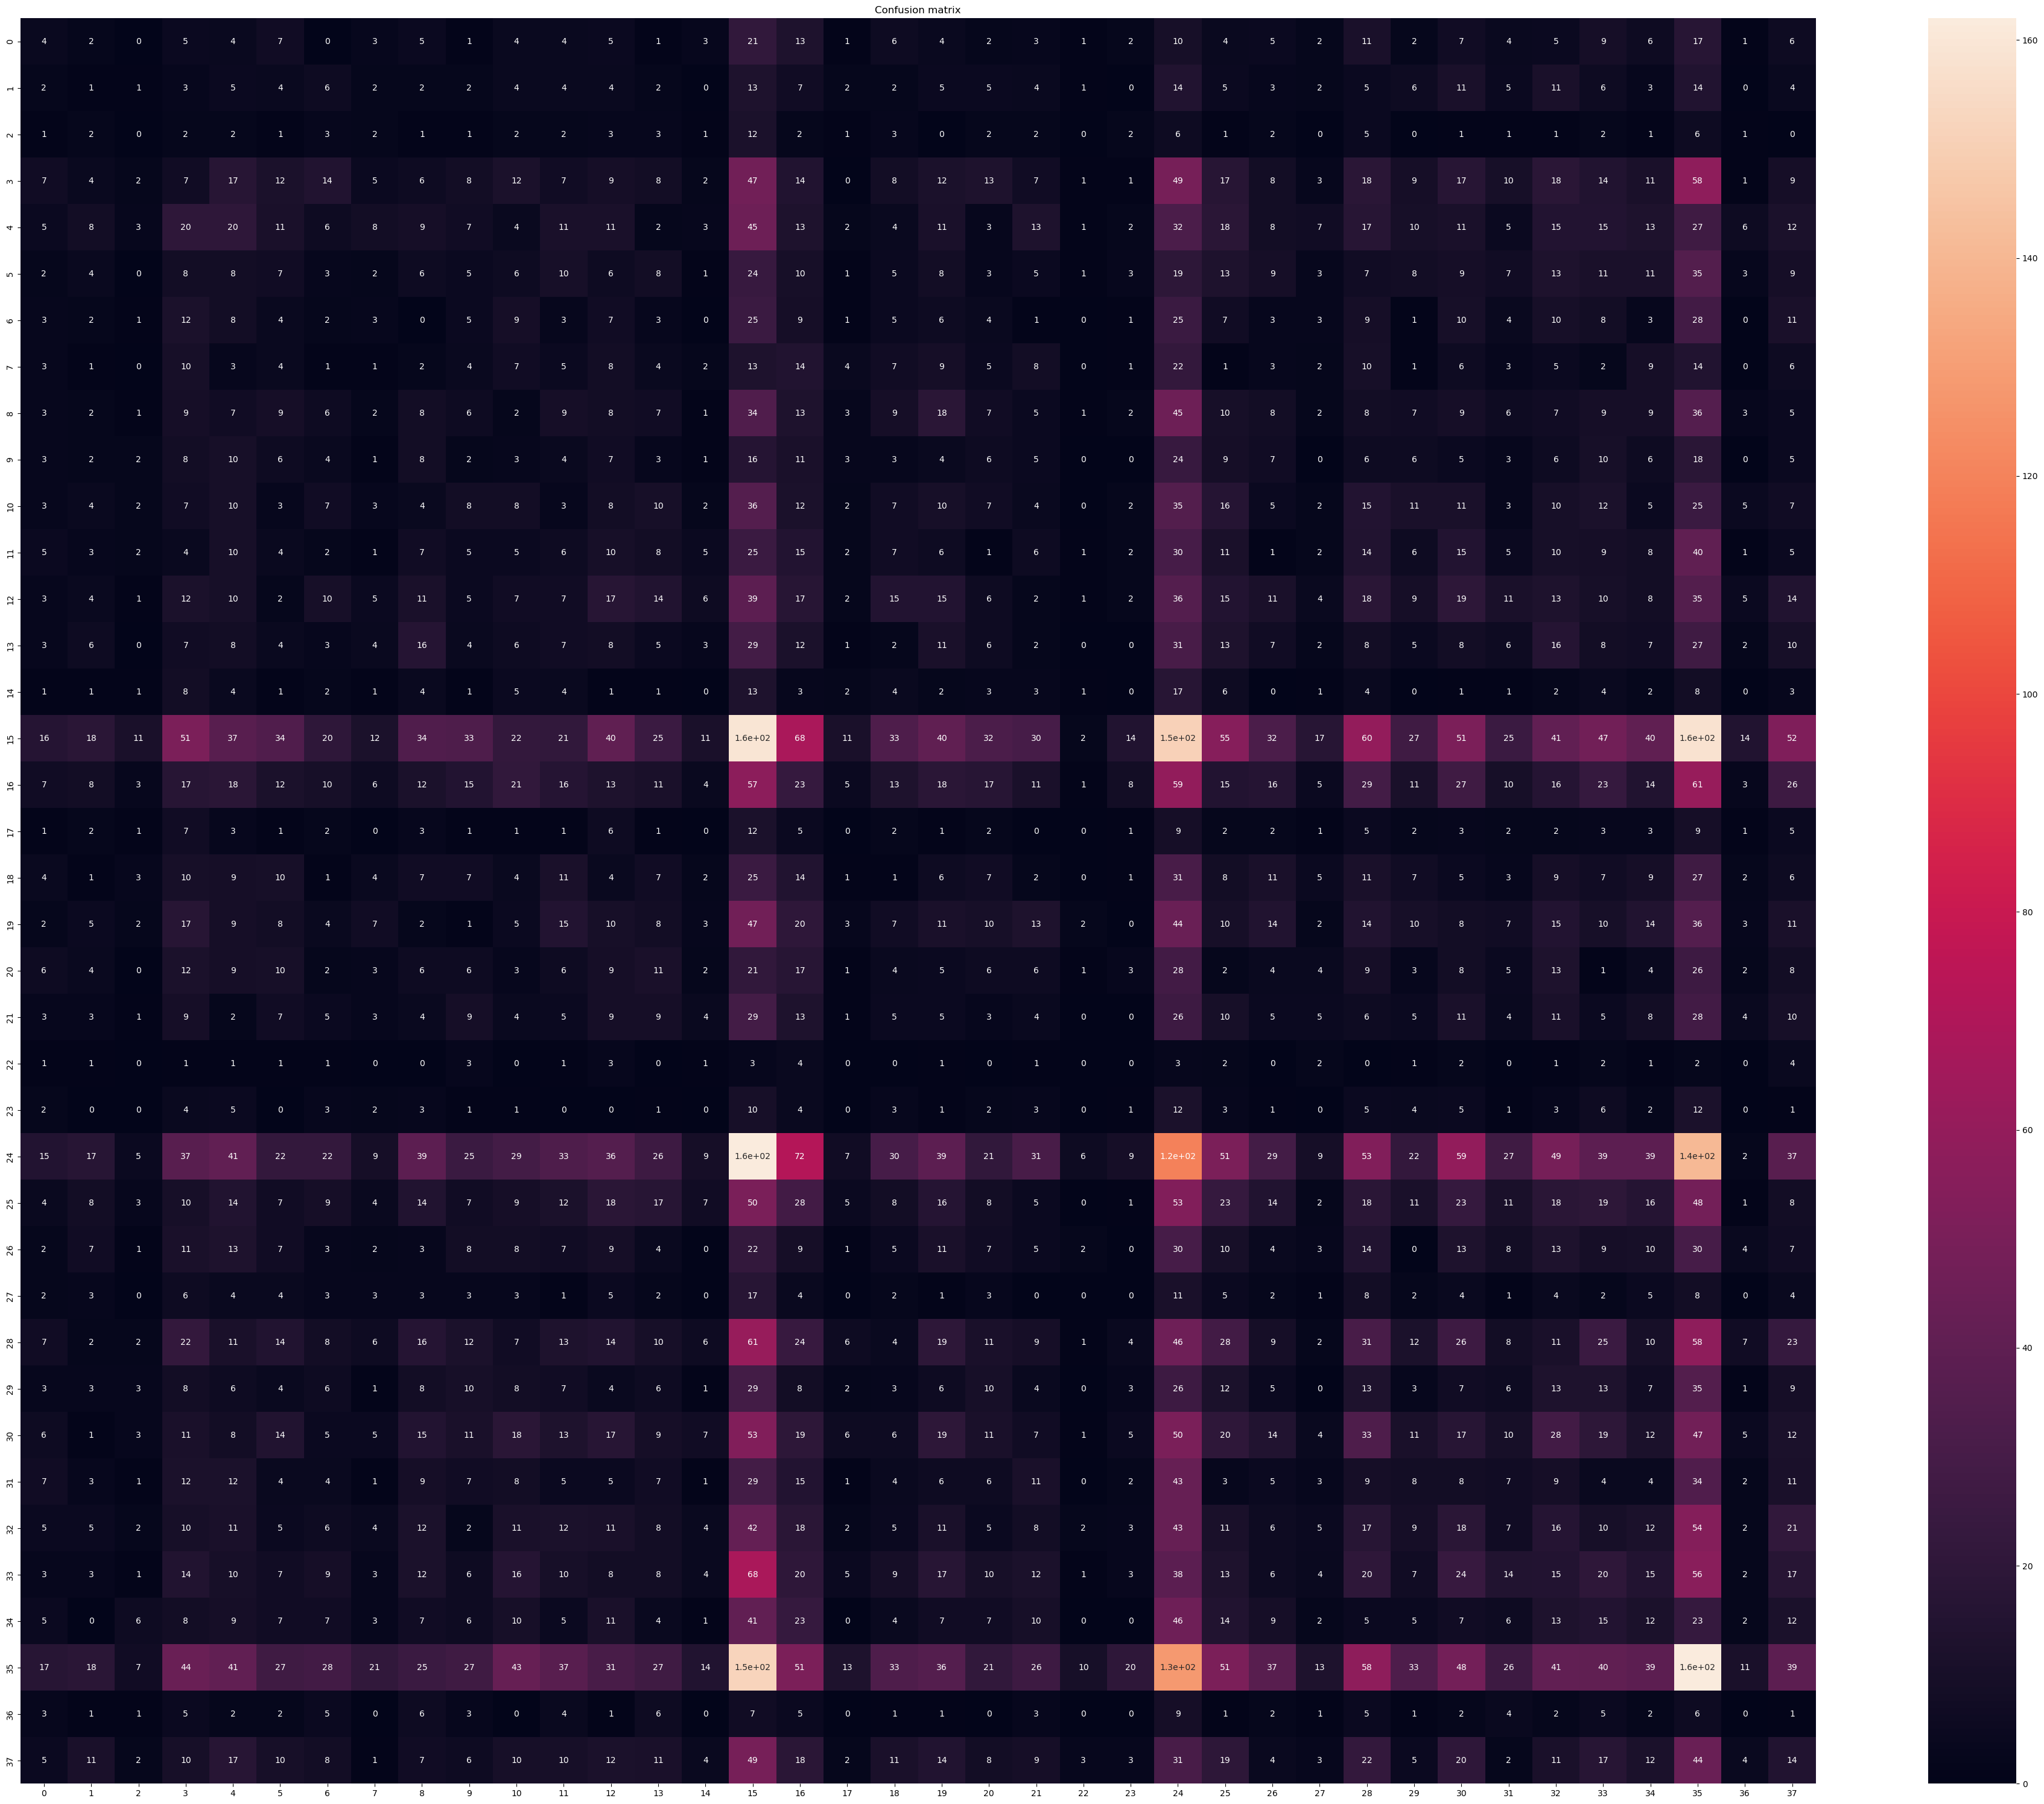

In [29]:
p = model1.predict(val_generator)
p = np.argmax(p, axis=1)
y_true = val_generator.classes
c = confusion_matrix(p, y_true)

plt.figure(figsize=(48,38))
plt.title('Confusion matrix')
sns.heatmap(c, annot=True)
plt.plot()
plt.savefig("model1_Confusion_matrix.png")

In [31]:
model1.save("InceptionResNetV2.h5")

#Mobile Net

In [4]:
from tensorflow.keras.applications.mobilenet import preprocess_input

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./output/train',
                                                 target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=train_datagen.flow_from_directory('./output/val',
                                                     target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 52131 images belonging to 38 classes.
Found 15178 images belonging to 38 classes.


In [5]:
base_model=tf.keras.applications.MobileNet(input_shape=IMG_SHAPE, weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(38,activation='softmax')(x)

17227776/17225924 [==============================] - 3s 0us/step


In [6]:
model2=Model(inputs=base_model.input,outputs=preds)

In [7]:
for layer in model2.layers[:20]:
    layer.trainable=False
for layer in model2.layers[20:]:
    layer.trainable=True

In [8]:
model2.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)

In [11]:
step_size_train=train_generator.n//train_generator.batch_size
model2_history=model2.fit(train_generator,
                    validation_data =val_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
3258/3258 [==============================] - 349s 107ms/step - loss: 0.5439 - tp: 41848.0000 - fp: 4661.0000 - tn: 1923594.0000 - fn: 10267.0000 - accuracy: 0.8438 - precision: 0.8998 - recall: 0.8030 - auc: 0.9899 - val_loss: 0.4154 - val_tp: 13383.0000 - val_fp: 1340.0000 - val_tn: 560246.0000 - val_fn: 1795.0000 - val_accuracy: 0.8939 - val_precision: 0.9090 - val_recall: 0.8817 - val_auc: 0.9892
Epoch 2/10
3258/3258 [==============================] - 375s 115ms/step - loss: 0.2507 - tp: 47709.0000 - fp: 2658.0000 - tn: 1925597.0000 - fn: 4406.0000 - accuracy: 0.9308 - precision: 0.9472 - recall: 0.9155 - auc: 0.9956 - val_loss: 0.1844 - val_tp: 14359.0000 - val_fp: 613.0000 - val_tn: 560973.0000 - val_fn: 819.0000 - val_accuracy: 0.9528 - val_precision: 0.9591 - val_recall: 0.9460 - val_auc: 0.9957
Epoch 3/10
3258/3258 [==============================] - 329s 101ms/step - loss: 0.1860 - tp: 48951.0000 - fp: 2000.0000 - tn: 1926255.0000 - fn: 3164.0000 - accuracy: 0.9496 -

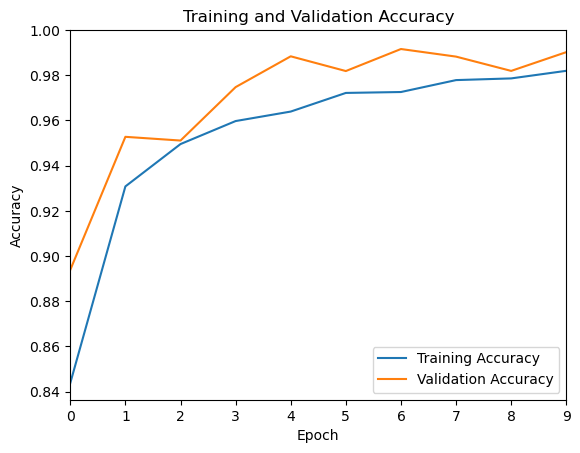

In [12]:
acc = model2_history.history['accuracy']
val_acc = model2_history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

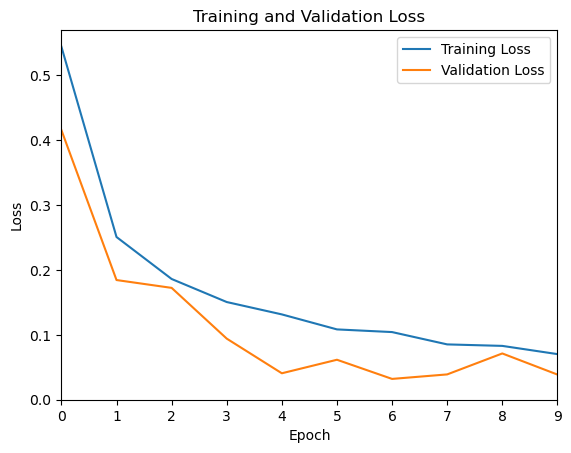

In [13]:
loss = model2_history.history['loss']
val_loss = model2_history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlim([0,9])
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

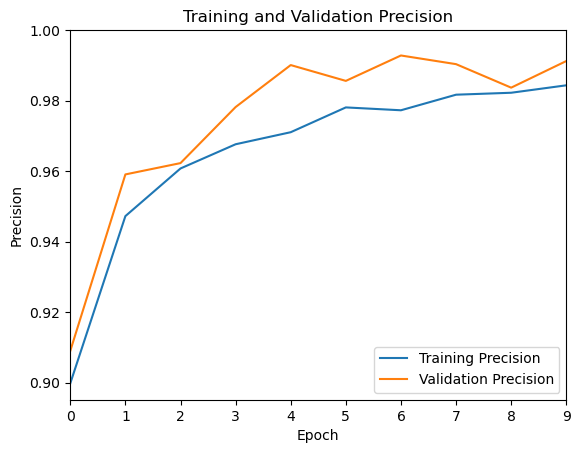

In [14]:
pre = model2_history.history['precision']
val_pre = model2_history.history['val_precision']

plt.plot(pre, label='Training Precision')
plt.plot(val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.show()

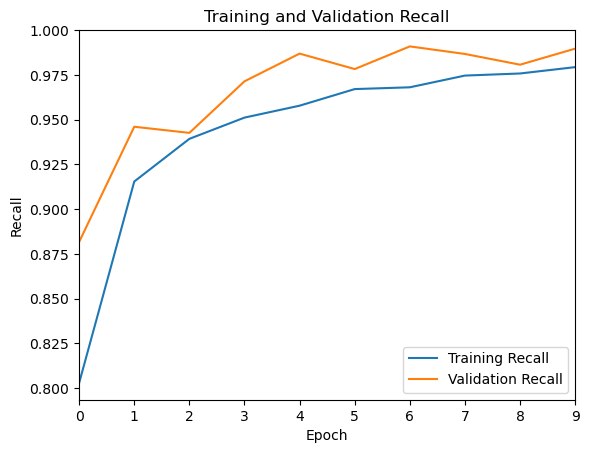

In [15]:
rec = model2_history.history['recall']
val_rec = model2_history.history['val_recall']

plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel("Recall")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.show()

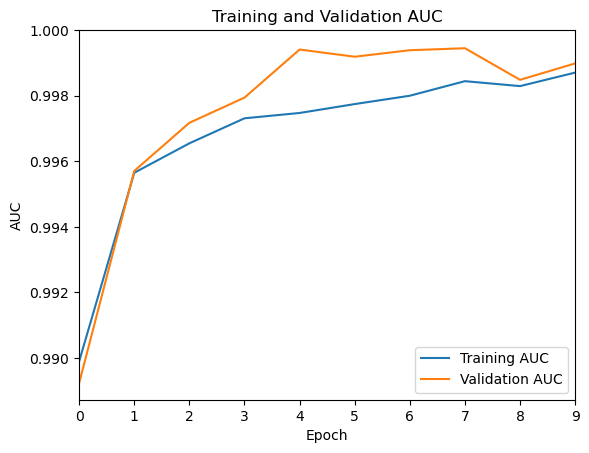

In [17]:
auc = model2_history.history['auc']
val_auc = model2_history.history['val_auc']

plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel("AUC")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.show()

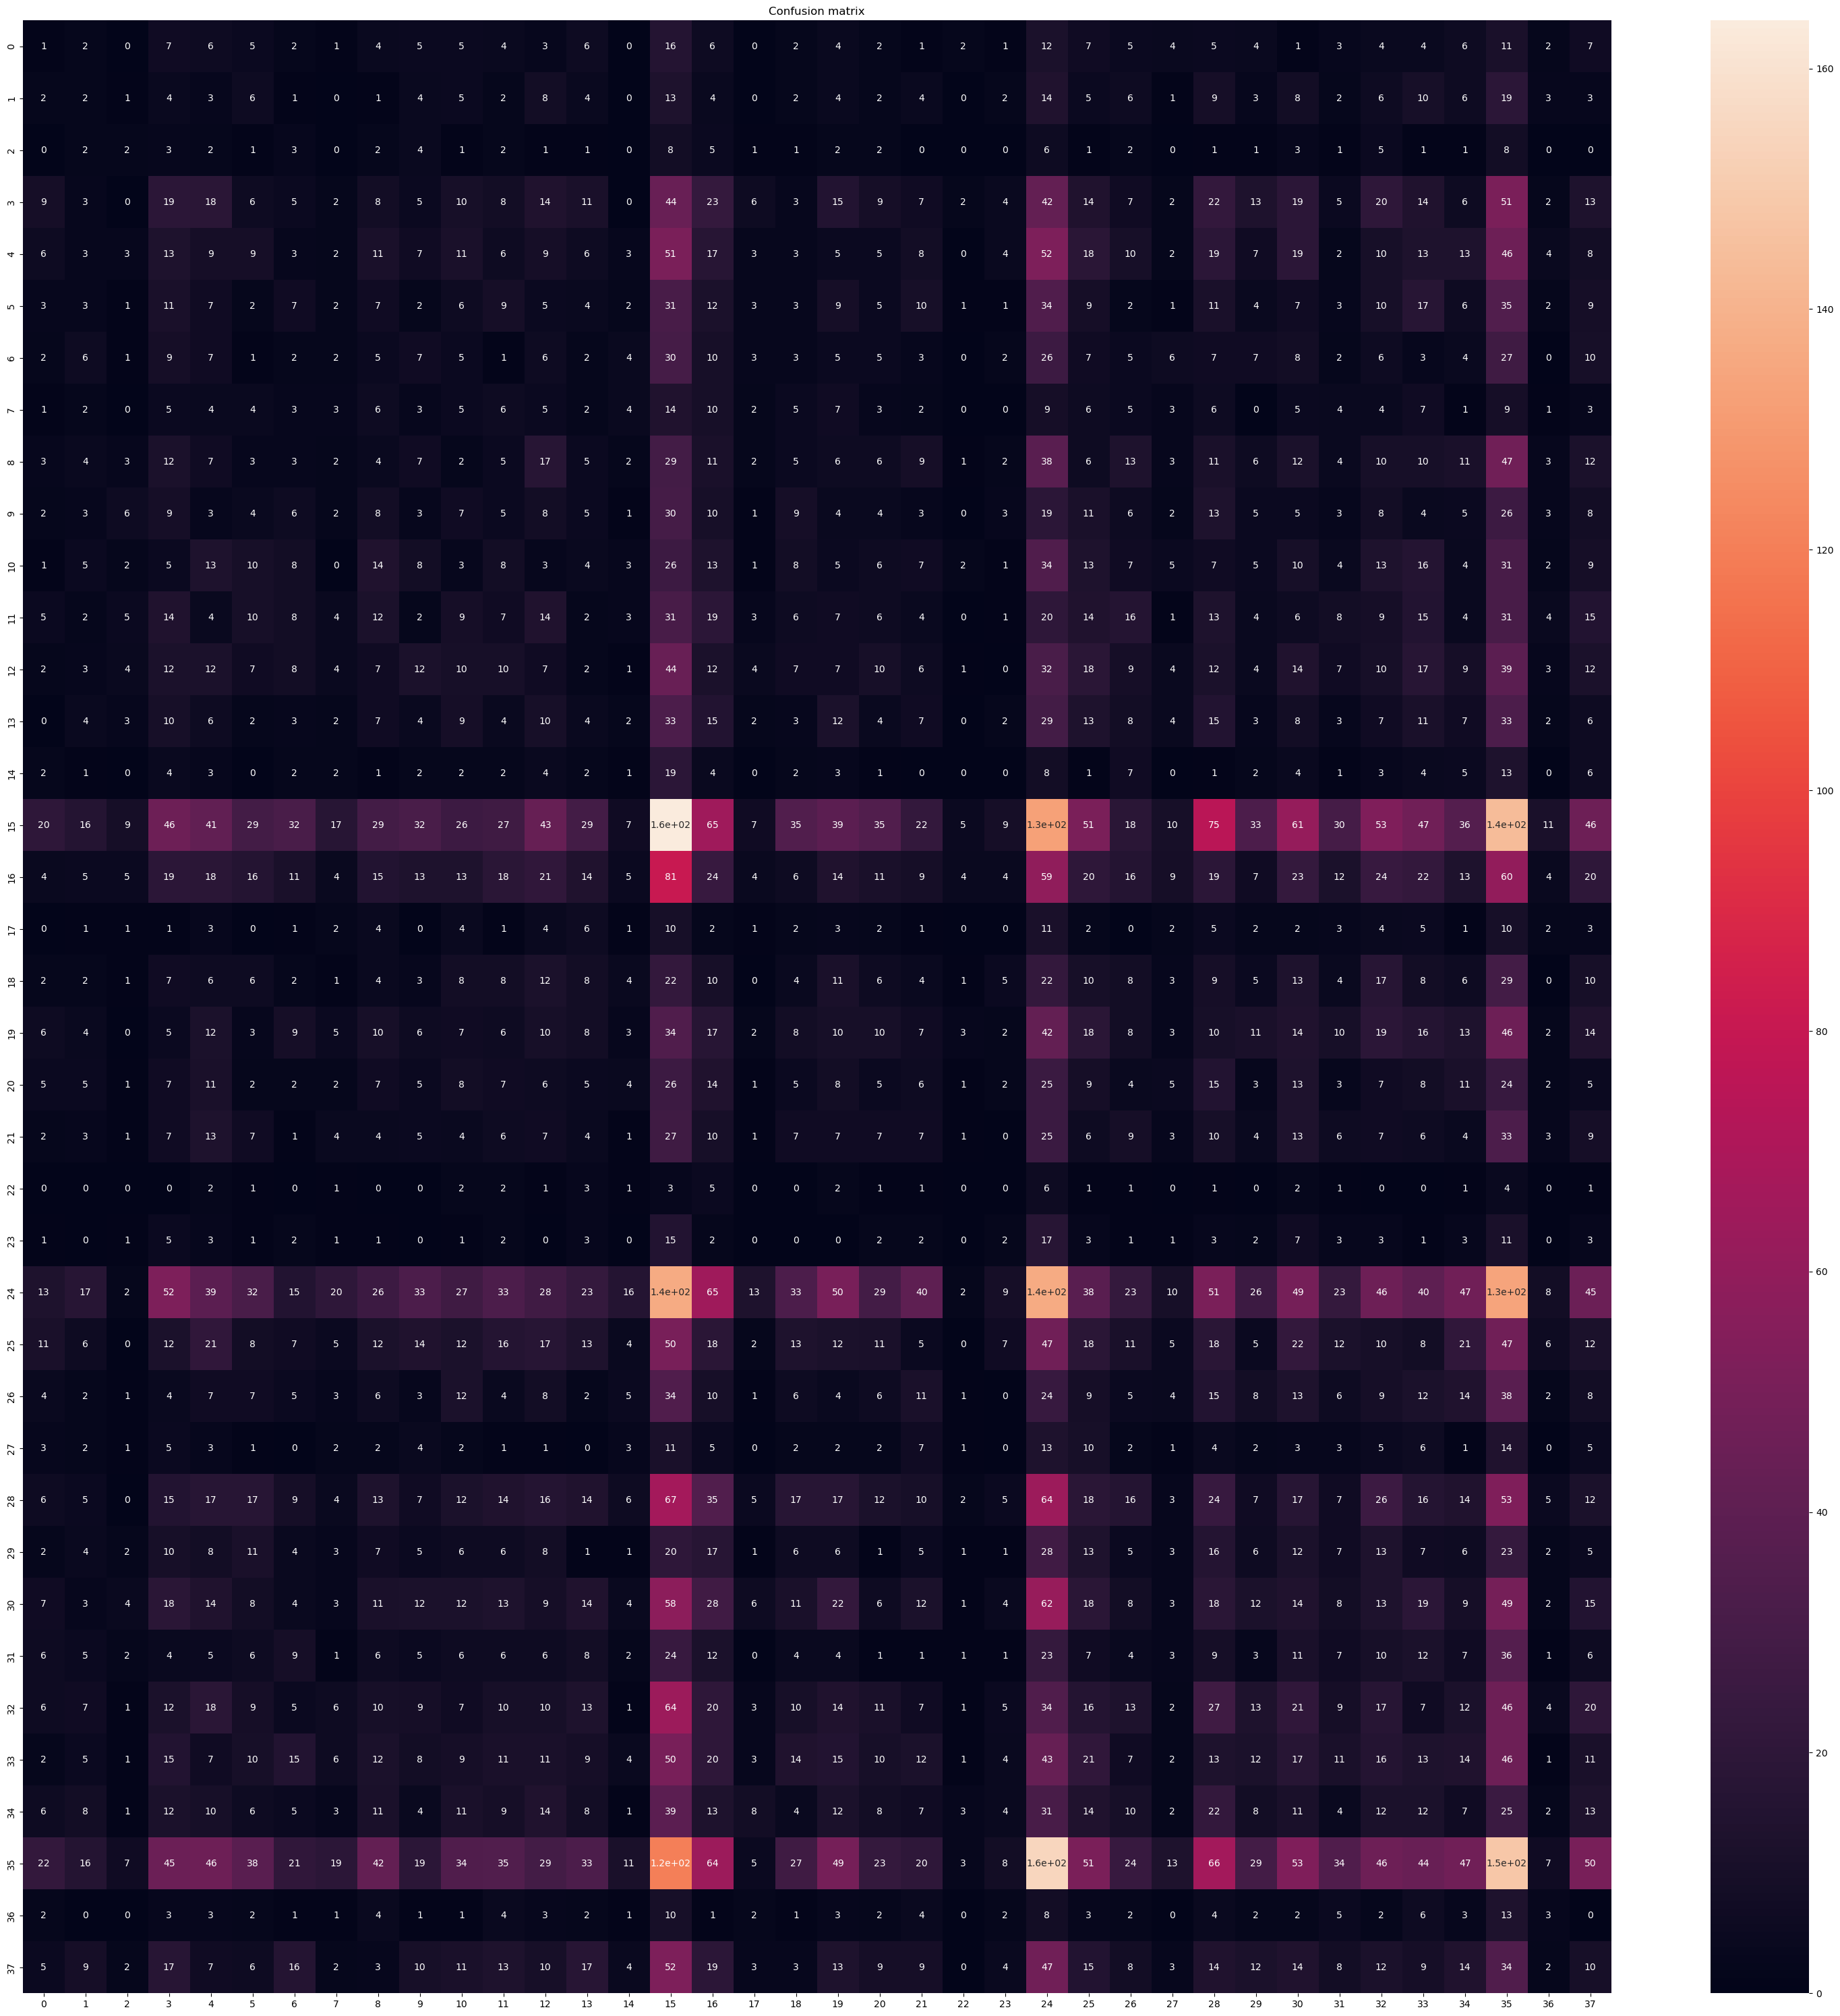

In [18]:
p = model2.predict(val_generator)
p = np.argmax(p, axis=1)
y_true = val_generator.classes
c = confusion_matrix(p, y_true)

plt.figure(figsize=(38,38))
plt.title('Confusion matrix')
sns.heatmap(c, annot=True)
plt.plot()
plt.savefig("model2_Confusion_matrix.png")

In [19]:
model2.save("MobileNet.h5")

VGG16

In [4]:
from tensorflow.keras.applications.vgg16 import preprocess_input

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./output/train',
                                                 target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=train_datagen.flow_from_directory('./output/val',
                                                     target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 52131 images belonging to 38 classes.
Found 15178 images belonging to 38 classes.


In [5]:
base_model=tf.keras.applications.VGG16(input_shape=IMG_SHAPE, weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(38,activation='softmax')(x)

58892288/58889256 [==============================] - 9s 0us/step


In [6]:
model3=Model(inputs=base_model.input,outputs=preds)

In [7]:
for layer in model3.layers[:20]:
    layer.trainable=False
for layer in model3.layers[20:]:
    layer.trainable=True

In [8]:
model3.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)

In [9]:
step_size_train=train_generator.n//train_generator.batch_size
model3_history=model3.fit(train_generator,
                    validation_data =val_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
3258/3258 [==============================] - 659s 202ms/step - loss: 0.3938 - tp: 44433.0000 - fp: 3860.0000 - tn: 1924395.0000 - fn: 7682.0000 - accuracy: 0.8816 - precision: 0.9201 - recall: 0.8526 - auc: 0.9936 - val_loss: 0.2155 - val_tp: 13969.0000 - val_fp: 798.0000 - val_tn: 560788.0000 - val_fn: 1209.0000 - val_accuracy: 0.9322 - val_precision: 0.9460 - val_recall: 0.9203 - val_auc: 0.9970
Epoch 2/10
3258/3258 [==============================] - 668s 205ms/step - loss: 0.2002 - tp: 48381.0000 - fp: 2409.0000 - tn: 1925846.0000 - fn: 3734.0000 - accuracy: 0.9390 - precision: 0.9526 - recall: 0.9284 - auc: 0.9969 - val_loss: 0.1279 - val_tp: 14405.0000 - val_fp: 485.0000 - val_tn: 561101.0000 - val_fn: 773.0000 - val_accuracy: 0.9580 - val_precision: 0.9674 - val_recall: 0.9491 - val_auc: 0.9985
Epoch 3/10
3258/3258 [==============================] - 603s 185ms/step - loss: 0.1679 - tp: 49181.0000 - fp: 1979.0000 - tn: 1926276.0000 - fn: 2934.0000 - accuracy: 0.9514 - p

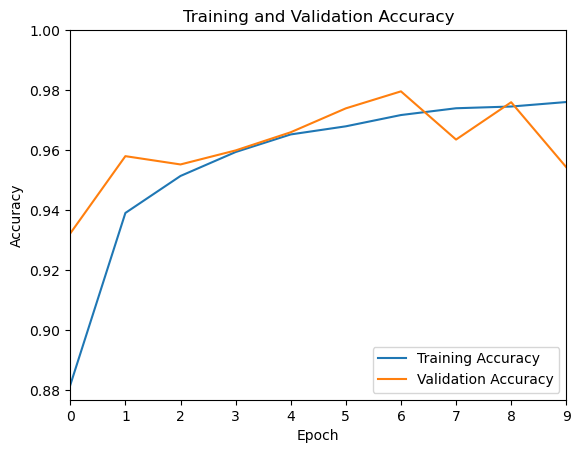

In [10]:
acc = model3_history.history['accuracy']
val_acc = model3_history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

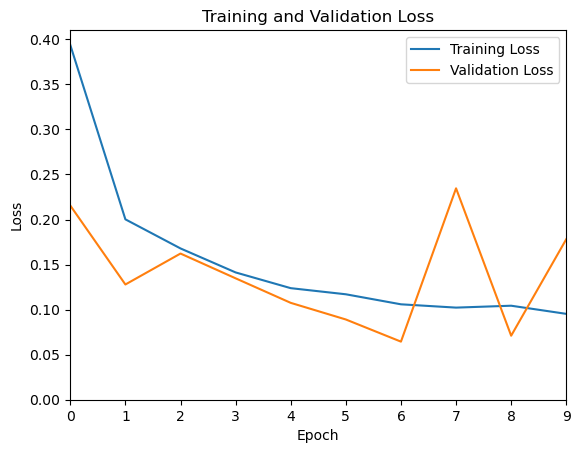

<Figure size 640x480 with 0 Axes>

In [12]:
loss = model3_history.history['loss']
val_loss = model3_history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlim([0,9])
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Loss.png")

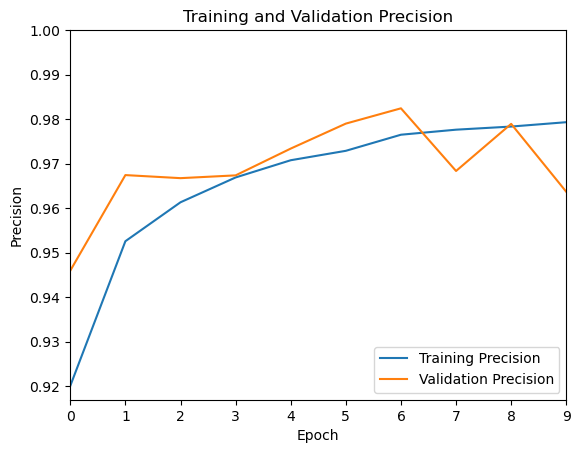

<Figure size 640x480 with 0 Axes>

In [13]:
pre = model3_history.history['precision']
val_pre = model3_history.history['val_precision']

plt.plot(pre, label='Training Precision')
plt.plot(val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Precision.png")

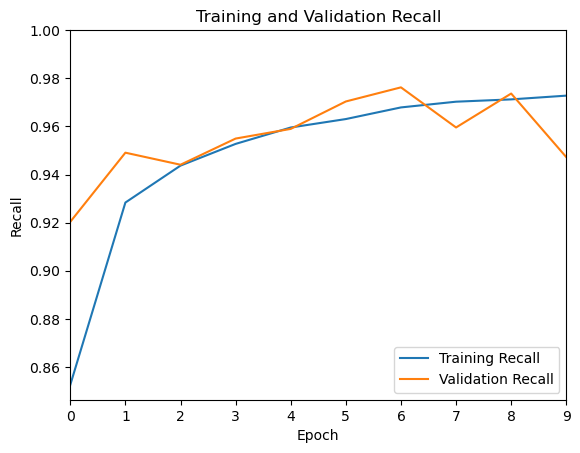

<Figure size 640x480 with 0 Axes>

In [14]:
rec = model3_history.history['recall']
val_rec = model3_history.history['val_recall']

plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel("Recall")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Recall.png")

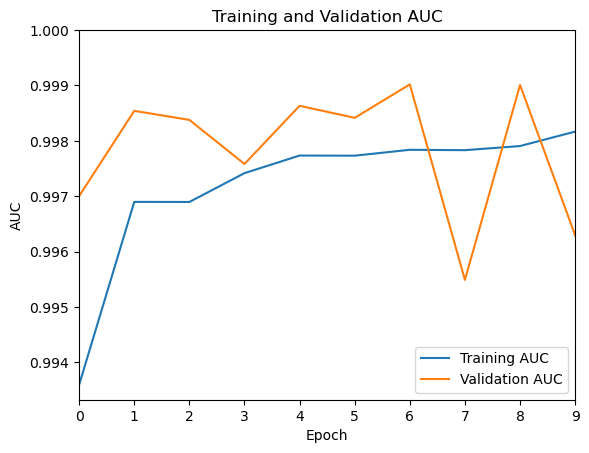

<Figure size 640x480 with 0 Axes>

In [15]:
auc = model3_history.history['auc']
val_auc = model3_history.history['val_auc']

plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel("AUC")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Auc.png")

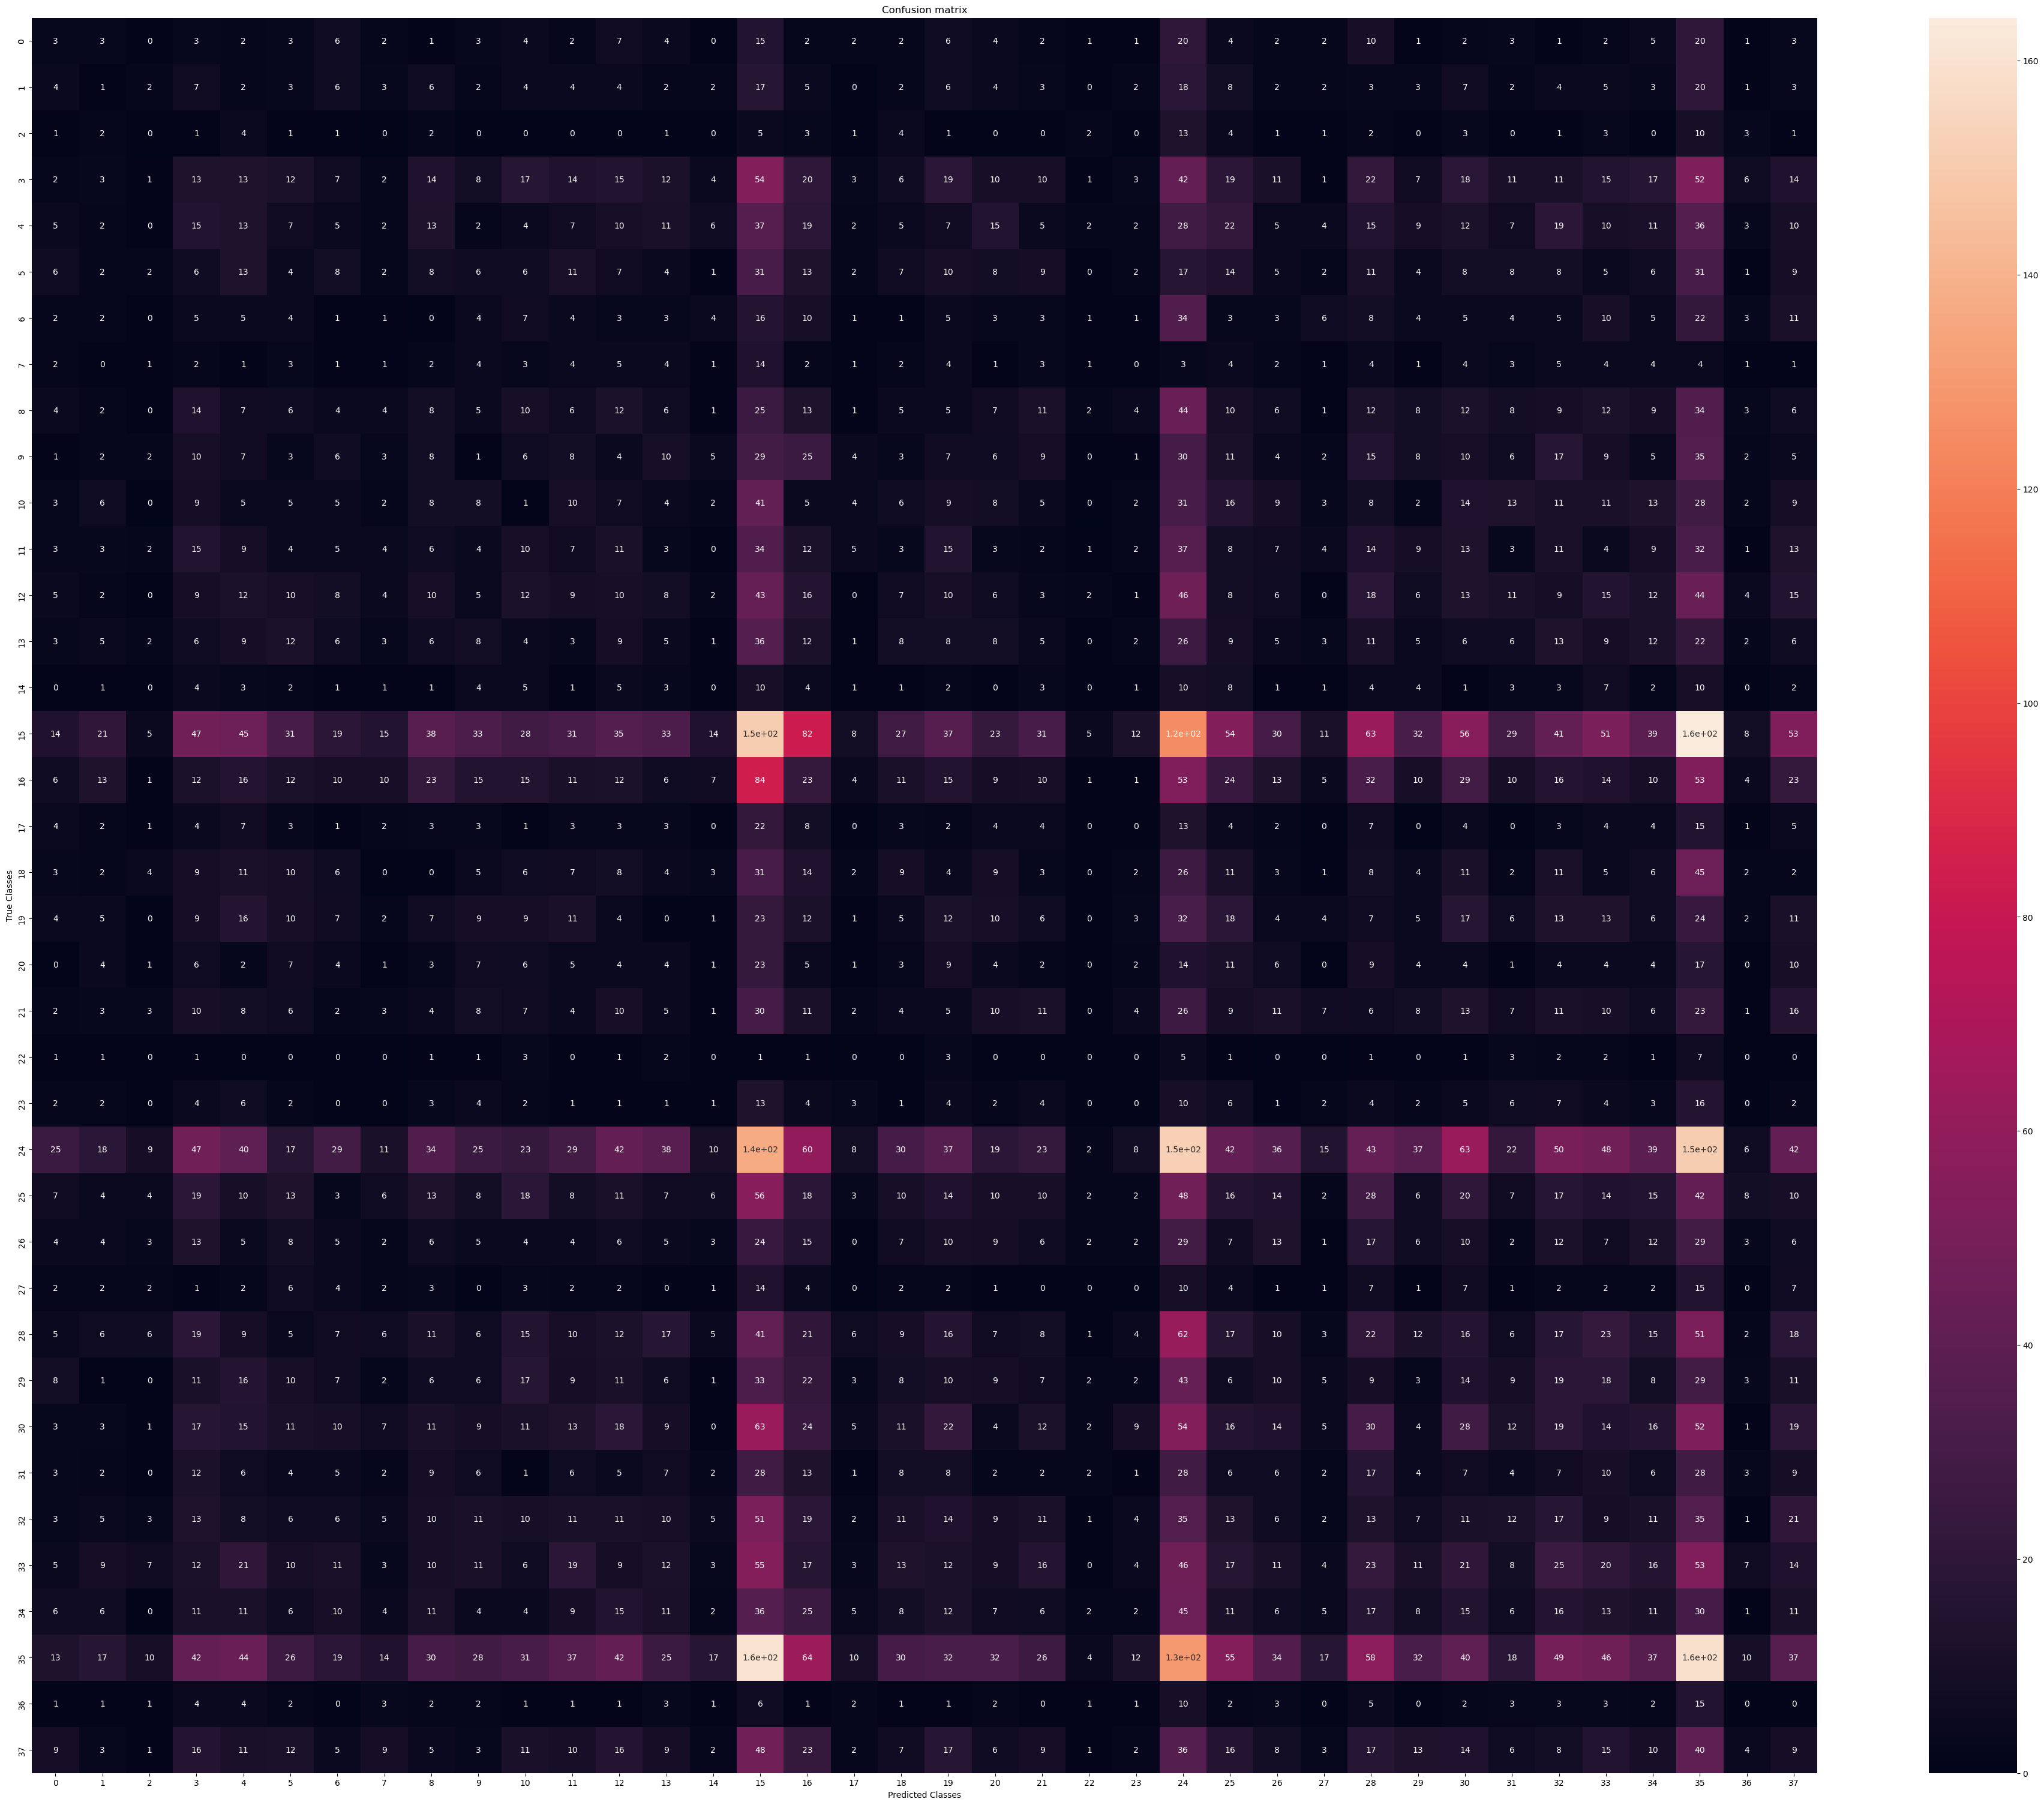

In [16]:
p = model3.predict(val_generator)
p = np.argmax(p, axis=1)
y_true = val_generator.classes
c = confusion_matrix(p, y_true)

plt.figure(figsize=(48,38))
plt.title('Confusion matrix')
sns.heatmap(c, annot=True)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.plot()
plt.savefig("model_Confusion_matrix.png")

In [17]:
model3.save("VGG16")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: VGG16\assets


VGG 19

In [4]:
from tensorflow.keras.applications.vgg19 import preprocess_input

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./output/train',
                                                 target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator=train_datagen.flow_from_directory('./output/val',
                                                     target_size=IMG_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 52131 images belonging to 38 classes.
Found 15178 images belonging to 38 classes.


In [5]:
classes = train_generator.class_indices
class_list = list(classes.keys())

In [6]:
base_model=tf.keras.applications.VGG19(input_shape=IMG_SHAPE, weights='imagenet',include_top=False)

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
preds=Dense(38,activation='softmax')(x)

80142336/80134624 [==============================] - 168s 2us/step


In [7]:
model4=Model(inputs=base_model.input,outputs=preds)

In [8]:
for layer in model4.layers[:20]:
    layer.trainable=False
for layer in model4.layers[20:]:
    layer.trainable=True

In [9]:
model4.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=METRICS)

In [10]:
step_size_train=train_generator.n//train_generator.batch_size
model_history=model4.fit(train_generator,
                    validation_data =val_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
3258/3258 [==============================] - 869s 267ms/step - loss: 0.4564 - tp: 43957.0000 - fp: 3842.0000 - tn: 1924413.0000 - fn: 8158.0000 - accuracy: 0.8749 - precision: 0.9196 - recall: 0.8435 - auc: 0.9912 - val_loss: 0.2116 - val_tp: 14043.0000 - val_fp: 653.0000 - val_tn: 560933.0000 - val_fn: 1135.0000 - val_accuracy: 0.9420 - val_precision: 0.9556 - val_recall: 0.9252 - val_auc: 0.9964
Epoch 2/10
3258/3258 [==============================] - 854s 262ms/step - loss: 0.2346 - tp: 48387.0000 - fp: 2215.0000 - tn: 1926040.0000 - fn: 3728.0000 - accuracy: 0.9419 - precision: 0.9562 - recall: 0.9285 - auc: 0.9953 - val_loss: 0.1461 - val_tp: 14352.0000 - val_fp: 427.0000 - val_tn: 561159.0000 - val_fn: 826.0000 - val_accuracy: 0.9578 - val_precision: 0.9711 - val_recall: 0.9456 - val_auc: 0.9979
Epoch 3/10
3258/3258 [==============================] - 832s 255ms/step - loss: 0.1690 - tp: 49436.0000 - fp: 1680.0000 - tn: 1926575.0000 - fn: 2679.0000 - accuracy: 0.9572 - p

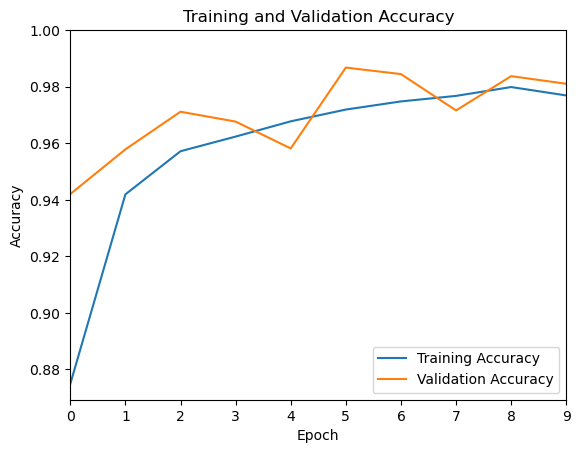

<Figure size 640x480 with 0 Axes>

In [11]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Accuracy.png")

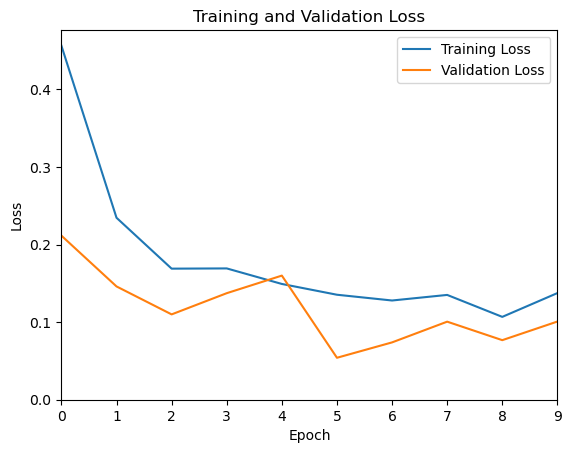

<Figure size 640x480 with 0 Axes>

In [13]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlim([0,9])
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Loss.png")

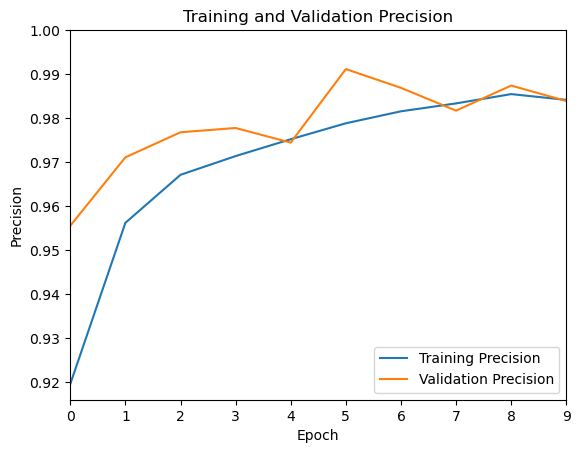

<Figure size 640x480 with 0 Axes>

In [14]:
pre = model_history.history['precision']
val_pre = model_history.history['val_precision']

plt.plot(pre, label='Training Precision')
plt.plot(val_pre, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Precision.png")

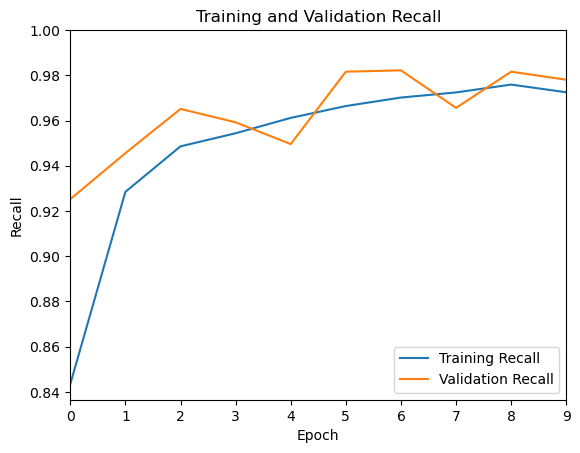

<Figure size 640x480 with 0 Axes>

In [15]:
rec = model_history.history['recall']
val_rec = model_history.history['val_recall']

plt.plot(rec, label='Training Recall')
plt.plot(val_rec, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel("Recall")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Recall.png")

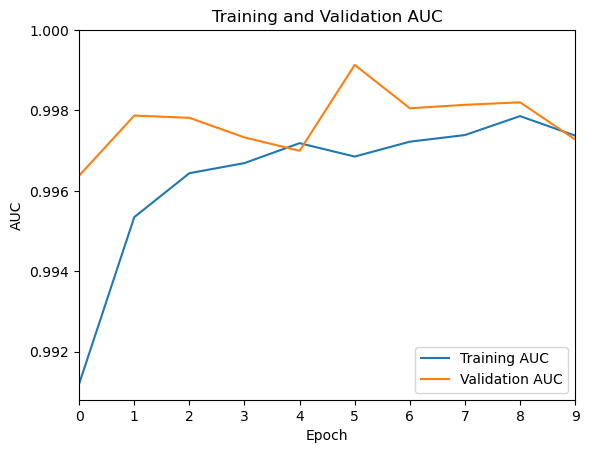

<Figure size 640x480 with 0 Axes>

In [16]:
auc = model_history.history['auc']
val_auc = model_history.history['val_auc']

plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel("AUC")
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.show()
plt.savefig("model_Auc.png")

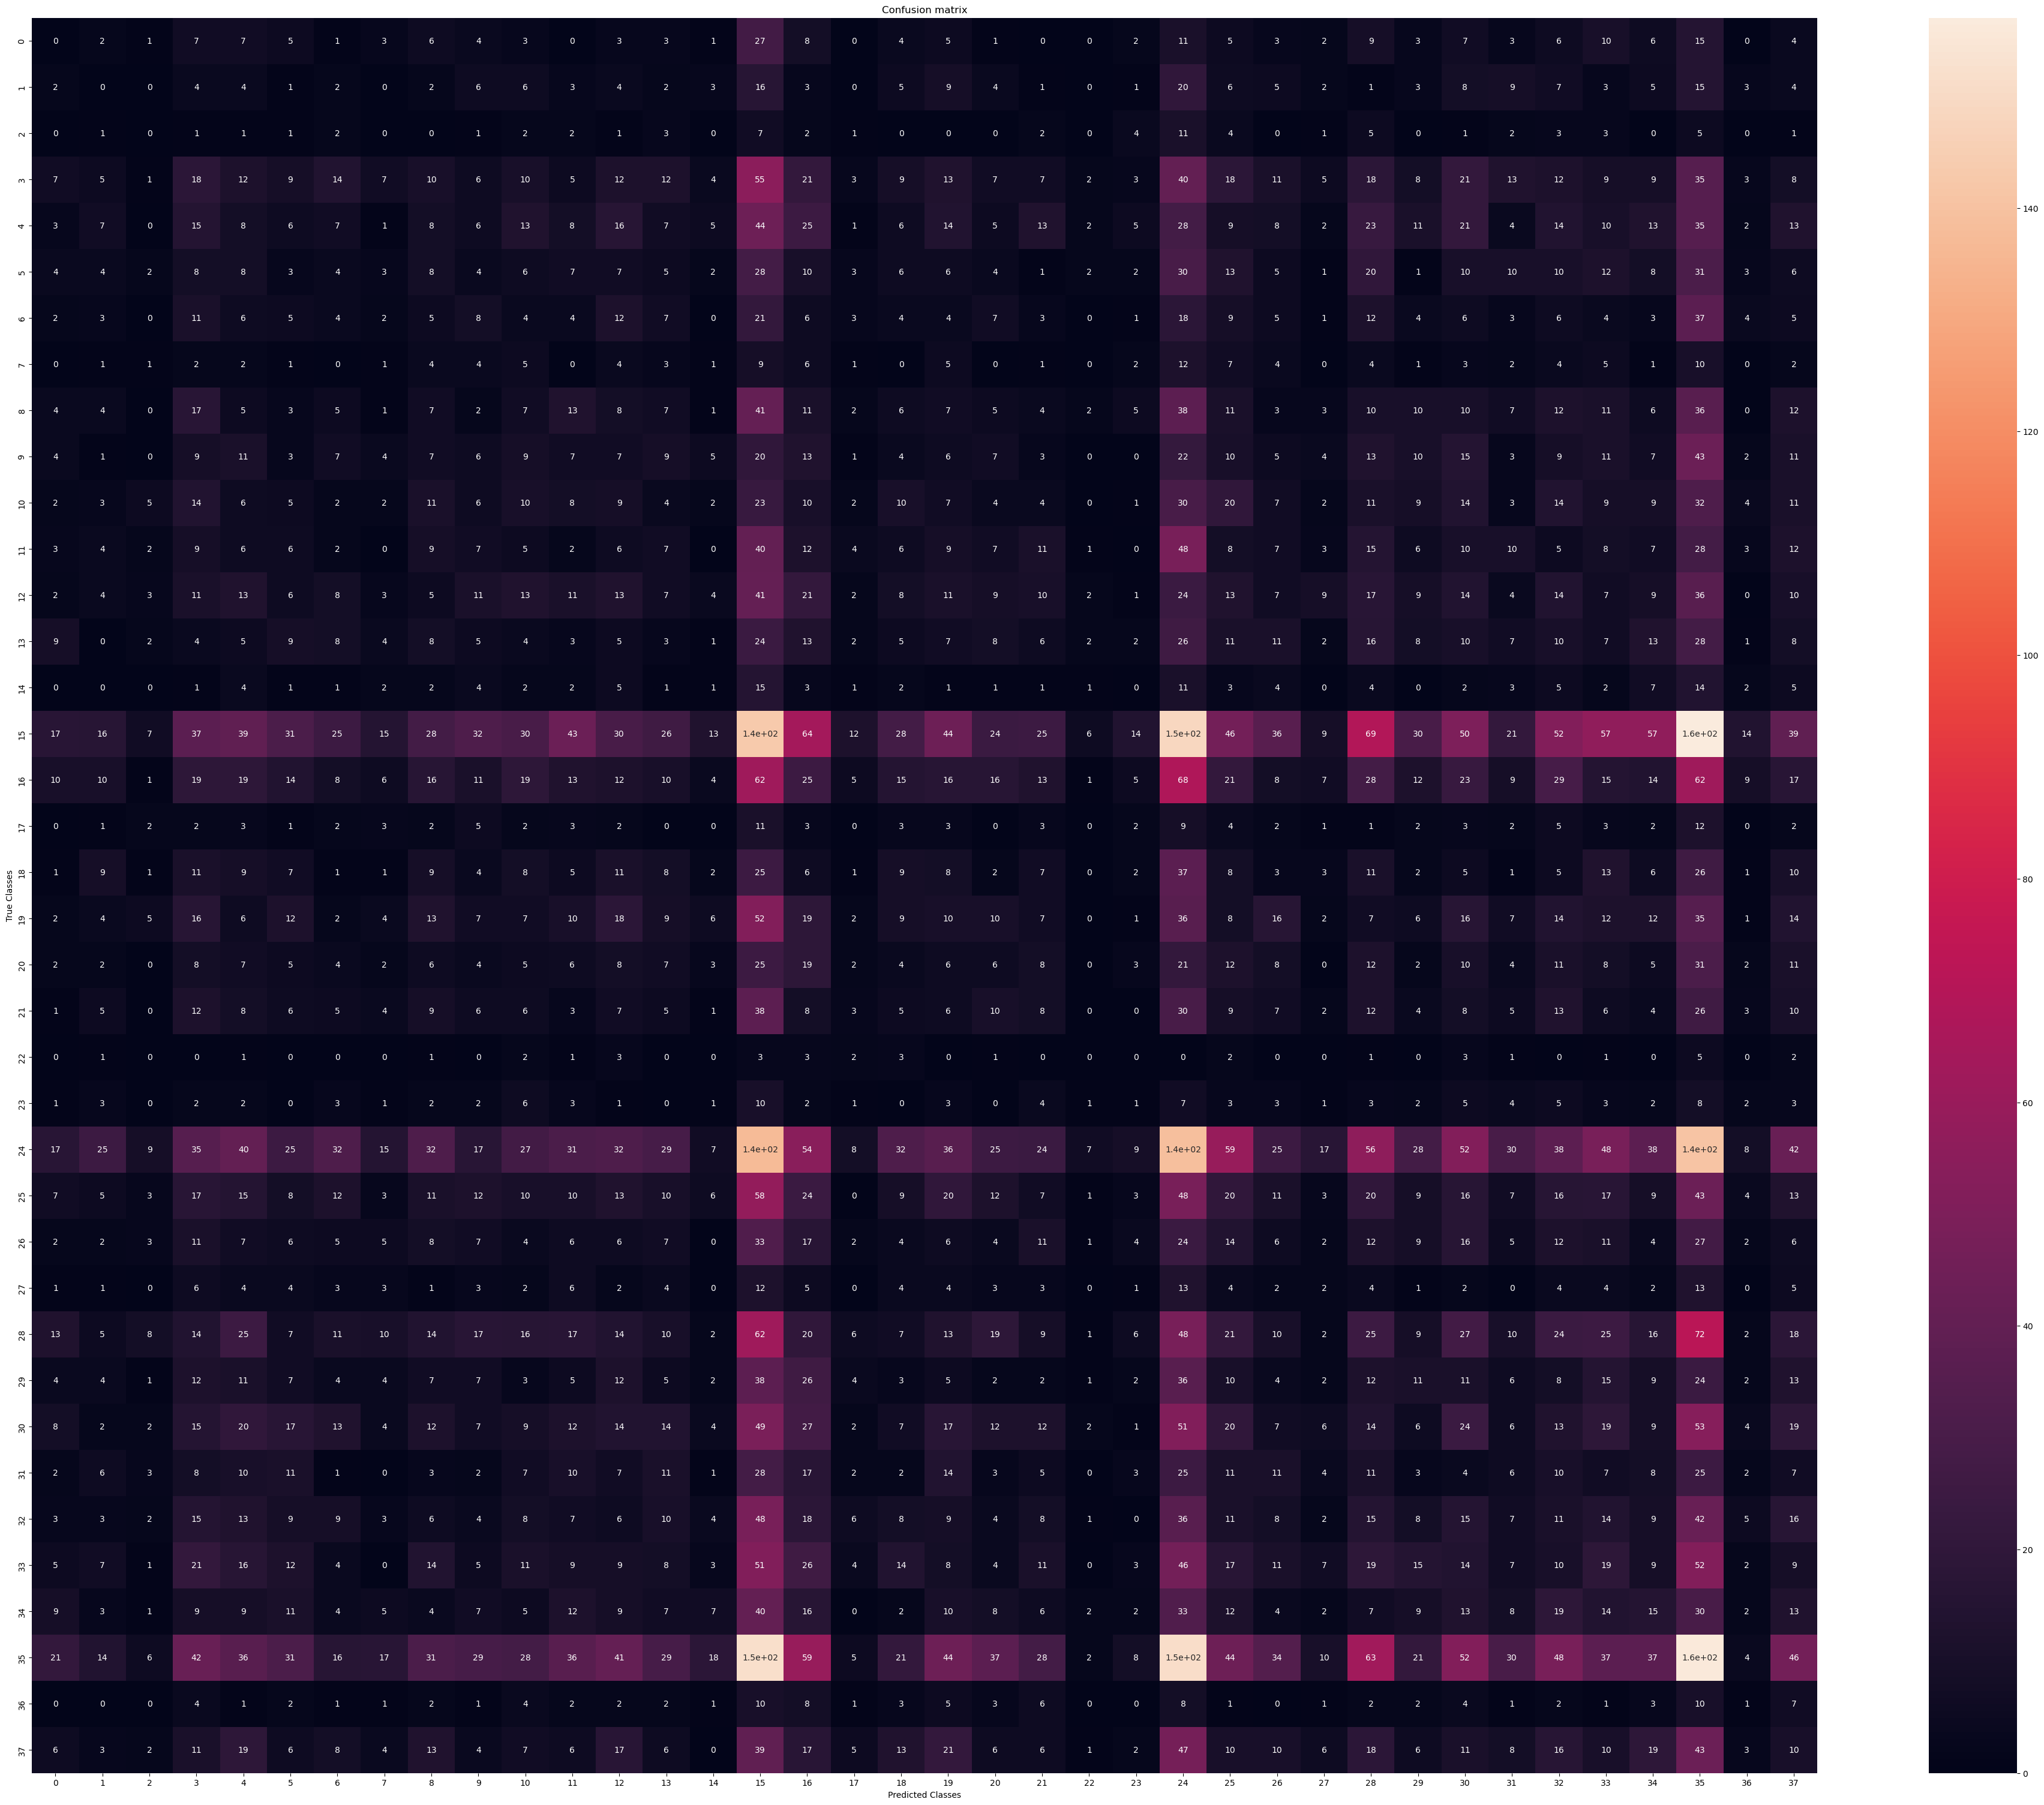

In [18]:
p = model4.predict(val_generator)
p = np.argmax(p, axis=1)
y_true = val_generator.classes
c = confusion_matrix(p, y_true)

plt.figure(figsize=(48,38))
plt.title('Confusion matrix')
sns.heatmap(c, annot=True)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.plot()
plt.savefig("model_Confusion_matrix.png")